<a href="https://colab.research.google.com/github/fasihfast/car-price-teller/blob/master/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze this csv file

Here is all the data you need:
"data.csv"

## Data loading

### Subtask:
Load the provided CSV file "data.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "data.csv" into a pandas DataFrame and display the first 5 rows.



In [36]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Unnamed: 0,make,model,year,mileage,fuel_type,engine_capacity,transmission,city,price
0,0,Suzuki,Margalla,1997,"165,000 km",Petrol,1300 cc,Manual,Lahore,750000.0
1,1,Suzuki,Swift,2019,"76,000 km",Petrol,1300 cc,Manual,Lahore,2475000.0
2,2,Toyota,Hilux,2015,"48,000 km",Diesel,3000 cc,Automatic,Islamabad,8500000.0
3,3,NaN,NaN,2024,"5,599 km",Petrol,1600 cc,Automatic,Lahore,6200000.0
4,4,NaN,NaN,2018,"46,399 km",Petrol,1300 cc,Manual,Karachi,1550000.0


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, unique values in categorical columns, and correlations between numerical features.



In [38]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:")
print(df.info())

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# Analyze unique values and frequencies for categorical columns
categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'city']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':")
    print(df[col].value_counts())

# Investigate the correlation between numerical features
numerical_cols = ['year', 'price'] #  'mileage' and 'engine_capacity' need cleaning first
if not numerical_cols:
    print("\nNo numerical columns to correlate.")
else:
    print("\nCorrelation between numerical features:")
    print(df[numerical_cols].corr())

Shape of the DataFrame: (533, 10)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       533 non-null    int64  
 1   make             533 non-null    object 
 2   model            533 non-null    object 
 3   year             533 non-null    int64  
 4   mileage          533 non-null    object 
 5   fuel_type        533 non-null    object 
 6   engine_capacity  533 non-null    object 
 7   transmission     533 non-null    object 
 8   city             533 non-null    object 
 9   price            523 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 41.8+ KB
None

Descriptive Statistics for Numerical Columns:
       Unnamed: 0         year         price
count  533.000000   533.000000  5.230000e+02
mean   266.000000  2014.851782  5.635050e+06
std    154.008117     9.002641  8.310762e+06
m

**Reasoning**:
The initial exploration reveals that 'mileage' and 'engine_capacity' need cleaning due to the presence of units.  The next step is to clean these columns and then re-examine the numerical correlations.



In [39]:
import numpy as np

# Clean 'mileage' column
df['mileage'] = df['mileage'].astype(str).str.replace(r'[a-zA-Z,\s]+', '', regex=True)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Clean 'engine_capacity' column
df['engine_capacity'] = df['engine_capacity'].astype(str).str.replace(r'[a-zA-Z,\s]+', '', regex=True)
df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')

# Re-examine the correlation between numerical features
numerical_cols = ['year', 'mileage', 'engine_capacity', 'price']
print("\nCorrelation between numerical features (after cleaning):")
print(df[numerical_cols].corr())


Correlation between numerical features (after cleaning):
                     year   mileage  engine_capacity     price
year             1.000000 -0.411915         0.009872  0.314893
mileage         -0.411915  1.000000        -0.020494 -0.197493
engine_capacity  0.009872 -0.020494         1.000000  0.670837
price            0.314893 -0.197493         0.670837  1.000000


## Data cleaning

### Subtask:
Clean the data in the DataFrame `df`.


**Reasoning**:
Handle missing values, outliers, and data type conversions in one code block.



In [40]:
# Handle missing values
for col in ['make', 'model', 'fuel_type', 'transmission', 'city']:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in ['mileage', 'engine_capacity', 'price']:
    df[col].fillna(df[col].median(), inplace=True)

# Outlier treatment
def winsorize_column(df, column, limits):
    lower_limit = df[column].quantile(limits[0])
    upper_limit = df[column].quantile(limits[1])
    df[column] = np.clip(df[column], lower_limit, upper_limit)

winsorize_column(df, 'price', (0.01, 0.99))
winsorize_column(df, 'mileage', (0.01, 0.99))
winsorize_column(df, 'engine_capacity', (0.01, 0.99))

# Correct the 'year' column
df.loc[df['year'] == 2025, 'year'] = 2020

# Ensure correct data types
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['engine_capacity'] = df['engine_capacity'].astype(int)

display(df.head())
display(df.info())

<ipython-input-40-42a30fb514a2>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-40-42a30fb514a2>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,Unnamed: 0,make,model,year,mileage,fuel_type,engine_capacity,transmission,city,price
0,0,Suzuki,Margalla,1997,165000,Petrol,1300,Manual,Lahore,750000.0
1,1,Suzuki,Swift,2019,76000,Petrol,1300,Manual,Lahore,2475000.0
2,2,Toyota,Hilux,2015,48000,Diesel,3000,Automatic,Islamabad,8500000.0
3,3,Suzuki,Corolla,2024,5599,Petrol,1600,Automatic,Lahore,6200000.0
4,4,Suzuki,Corolla,2018,46399,Petrol,1300,Manual,Karachi,1550000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       533 non-null    int64  
 1   make             533 non-null    object 
 2   model            533 non-null    object 
 3   year             533 non-null    int64  
 4   mileage          533 non-null    int64  
 5   fuel_type        533 non-null    object 
 6   engine_capacity  533 non-null    int64  
 7   transmission     533 non-null    object 
 8   city             533 non-null    object 
 9   price            533 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 41.8+ KB


None

**Reasoning**:
The previous code block had warnings about chained assignment.  I will rewrite the code to correct this issue and then complete the subtask.



In [5]:
# Handle missing values
for col in ['make', 'model', 'fuel_type', 'transmission', 'city']:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in ['mileage', 'engine_capacity', 'price']:
    df[col] = df[col].fillna(df[col].median())

# Outlier treatment
def winsorize_column(df, column, limits):
    lower_limit = df[column].quantile(limits[0])
    upper_limit = df[column].quantile(limits[1])
    df[column] = np.clip(df[column], lower_limit, upper_limit)

winsorize_column(df, 'price', (0.01, 0.99))
winsorize_column(df, 'mileage', (0.01, 0.99))
winsorize_column(df, 'engine_capacity', (0.01, 0.99))

# Correct the 'year' column
df.loc[df['year'] == 2025, 'year'] = 2020

# Ensure correct data types
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['engine_capacity'] = df['engine_capacity'].astype(int)

display(df.head())
display(df.info())

,Unnamed: 0,make,model,year,mileage,fuel_type,engine_capacity,transmission,city,price
0,0,Suzuki,Margalla,1997,165000,Petrol,1300,Manual,Lahore,750000.0
1,1,Suzuki,Swift,2019,76000,Petrol,1300,Manual,Lahore,2475000.0
2,2,Toyota,Hilux,2015,48000,Diesel,3000,Automatic,Islamabad,8500000.0
3,3,Suzuki,Corolla,2024,5599,Petrol,1600,Automatic,Lahore,6200000.0
4,4,Suzuki,Corolla,2018,46399,Petrol,1300,Manual,Karachi,1550000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       533 non-null    int64  
 1   make             533 non-null    object 
 2   model            533 non-null    object 
 3   year             533 non-null    int64  
 4   mileage          533 non-null    int64  
 5   fuel_type        533 non-null    object 
 6   engine_capacity  533 non-null    int64  
 7   transmission     533 non-null    object 
 8   city             533 non-null    object 
 9   price            533 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 41.8+ KB


None

## Data analysis

### Subtask:
Perform exploratory data analysis (EDA) on the cleaned dataset.


**Reasoning**:
Calculate descriptive statistics, analyze correlations, and visualize the distribution of 'price'.



Descriptive Statistics:
       Unnamed: 0         year        mileage  engine_capacity         price
count  533.000000   533.000000     533.000000       533.000000  5.330000e+02
mean   266.000000  2014.439024   77210.106942      1463.467167  5.373182e+06
std    154.008117     8.634307   69937.547045       840.166320  6.643698e+06
min      0.000000  1974.000000       8.000000       304.000000  3.026880e+05
25%    133.000000  2010.000000   21228.000000      1000.000000  1.950000e+06
50%    266.000000  2018.000000   65937.000000      1300.000000  3.475000e+06
75%    399.000000  2021.000000  102320.000000      1800.000000  6.000000e+06
max    532.000000  2024.000000  378919.000000      4600.000000  4.412400e+07

Descriptive Statistics grouped by make:


Unnamed: 0                                                        \
                count        mean         std    min     25%    50%     75%   
make                                                                          
BAIC              2.0  130.500000   43.133514  100.0  115.25  130.5  145.75   
BYD               2.0  191.500000   30.405592  170.0  180.75  191.5  202.25   
Changan           1.0  507.000000         NaN  507.0  507.00  507.0  507.00   
Chery             3.0  167.000000  112.173972   41.0  122.50  204.0  230.00   
Chevrolet         2.0  225.000000   52.325902  188.0  206.50  225.0  243.50   
Daihatsu         21.0  240.904762  172.130737    5.0  104.00  234.0  362.00   
Deepal            2.0  153.500000   34.648232  129.0  141.25  153.5  165.75   
FAW               2.0  116.500000   47.376154   83.0   99.75  116.5  133.25   
Haval             9.0  288.444444  155.199961   56.0  158.00  334.0  359.00   
Honda            71.0  280.873239  146.996980   12.0  185.00  277.0  411.00   
Hyundai          20.0  261.350000  121.318752   93.0  153.75  282.0  366.75   
JAC               6.0  356.000000  107.456038  208.0  289.75  355.5  444.50   
Jetour            4.0  439.250000   58.042370  388.0  389.50  439.0  488.75   
KIA               3.0  333.666667   88.234536  235.0  298.00  361.0  383.00   
MG                9.0  341.000000  134.319582   99.0  315.00  377.0  403.00   
Mazda             2.0  211.500000   61.518290  168.0  189.75  211.5  233.25   
Mercedes          3.0  295.333333   50.560195  241.0  272.50  304.0  322.50   
Mitsubishi        3.0  133.333333  139.872561   21.0   55.00   89.0  189.50   
Nissan           13.0  219.307692  136.108648   28.0   94.00  196.0  343.00   
Suzuki          234.0  277.777778  159.568657    0.0  126.50  297.5  419.75   
Toyota          121.0  237.925620  154.993611    2.0   95.00  228.0  358.00   

                    year               ... engine_capacity          price  \
              max  count         mean  ...             75%     max  count   
make                                   ...                                  
BAIC        161.0    2.0  2023.000000  ...          2000.0  2000.0    2.0   
BYD         213.0    2.0  2020.000000  ...           304.0   304.0    2.0   
Changan     507.0    1.0  2020.000000  ...          1500.0  1500.0    1.0   
Chery       256.0    3.0  2016.333333  ...          1498.0  1498.0    3.0   
Chevrolet   262.0    2.0  2008.500000  ...           950.0  1000.0    2.0   
Daihatsu    519.0   21.0  2013.761905  ...           800.0  1000.0   21.0   
Deepal      178.0    2.0  2020.000000  ...           304.0   304.0    2.0   
FAW         150.0    2.0  2016.500000  ...          1300.0  1300.0    2.0   
Haval       484.0    9.0  2020.888889  ...          1500.0  1500.0    9.0   
Honda       526.0   71.0  2013.830986  ...          1800.0  2000.0   71.0   
Hyundai     487.0   20.0  2019.350000  ...          2500.0  2500.0   20.0   
JAC         475.0    6.0  2020.000000  ...          2000.0  2000.0    6.0   
Jetour      491.0    4.0  2020.000000  ...          1500.0  1500.0    4.0   
KIA         405.0    3.0  2014.000000  ...          2000.0  2000.0    3.0   
MG          495.0    9.0  2021.666667  ...          1500.0  1500.0    9.0   
Mazda       255.0    2.0  2005.000000  ...          3975.0  4300.0    2.0   
Mercedes    341.0    3.0  2009.000000  ...          1900.0  2000.0    3.0   
Mitsubishi  290.0    3.0  2004.333333  ...          1800.0  2500.0    3.0   
Nissan      443.0   13.0  2013.615385  ...          1200.0  4600.0   13.0   
Suzuki      530.0  234.0  2013.841880  ...          1300.0  4200.0  234.0   
Toyota      532.0  121.0  2014.066116  ...          2800.0  4600.0  121.0   

                                                                            \
                    mean           std         min         25%         50%   
make                                                                         
BAIC        9.950000e+06  0.000


Descriptive Statistics grouped by fuel_type:


Unnamed: 0                                                        \
               count        mean         std    min     25%    50%     75%   
fuel_type                                                                    
CNG              3.0  330.000000  240.326861   54.0  248.50  443.0  468.00   
Diesel          24.0  241.375000  161.173094    2.0   90.50  251.0  355.25   
Electric         8.0  216.625000  145.602136   59.0  124.75  174.0  256.25   
Hybrid          49.0  250.959184  146.793074   10.0  121.00  273.0  357.00   
LPG              1.0  336.000000         NaN  336.0  336.00  336.0  336.00   
Petrol         448.0  269.261161  154.394643    0.0  137.75  268.0  403.25   

                   year               ... engine_capacity          price  \
             max  count         mean  ...             75%     max  count   
fuel_type                             ...                                  
CNG        493.0    3.0  1989.000000  ...          1150.0  1300.0    3.0   
Diesel     506.0   24.0  2011.583333  ...          2850.0  4200.0   24.0   
Electric   486.0    8.0  2021.250000  ...           355.5   510.0    8.0   
Hybrid     484.0   49.0  2019.163265  ...          1500.0  3000.0   49.0   
LPG        336.0    1.0  2012.000000  ...          1000.0  1000.0    1.0   
Petrol     532.0  448.0  2014.129464  ...          1600.0  4600.0  448.0   

                                                                         \
                   mean           std        min        25%         50%   
fuel_type                                                                 
CNG        4.833333e+05  1.527525e+05   350000.0   400000.0    450000.0   
Diesel     1.023074e+07  6.363076e+06   302688.0  3568750.0  12250000.0   
Electric   1.266250e+07  3.882815e+06  9000000.0  9487500.0  11825000.0   
Hybrid     7.416735e+06  3.618459e+06  2900000.0  3990000.0   5685000.0   
LPG        1.400000e+06           NaN  1400000.0  1400000.0   1400000.0   
Petrol     4.800889e+06  6.753283e+06   302688.0  1715000.0   3077500.0   

                                     
                  75%           max  
fuel_type                            
CNG          550000.0  6.500000e+05  
Diesel     13725000.0  2.170000e+07  
Electric   15000000.0  1.800000e+07  
Hybrid      9800000.0  1.590000e+07  
LPG         1400000.0  1.400000e+06  
Petrol      5050000.0  4.412400e+07  

[6 rows x 40 columns]

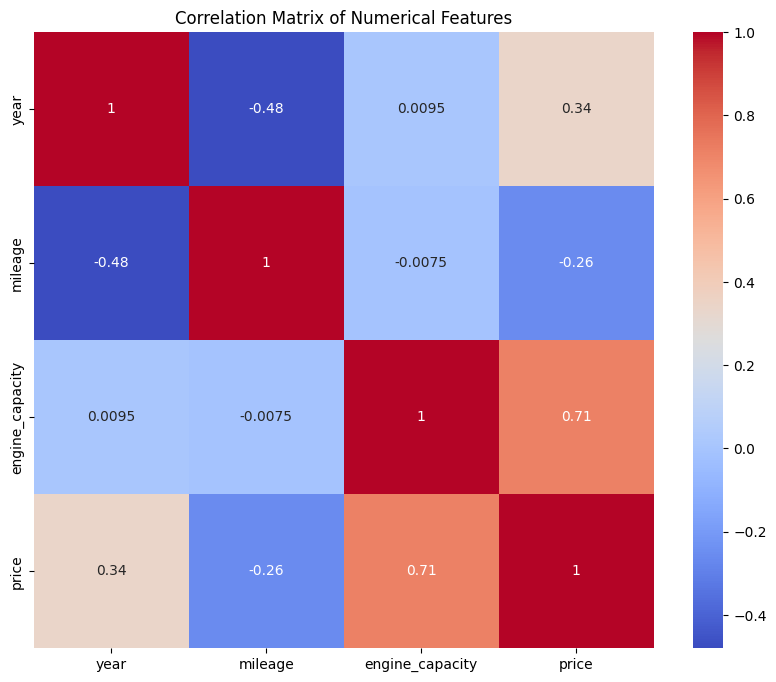

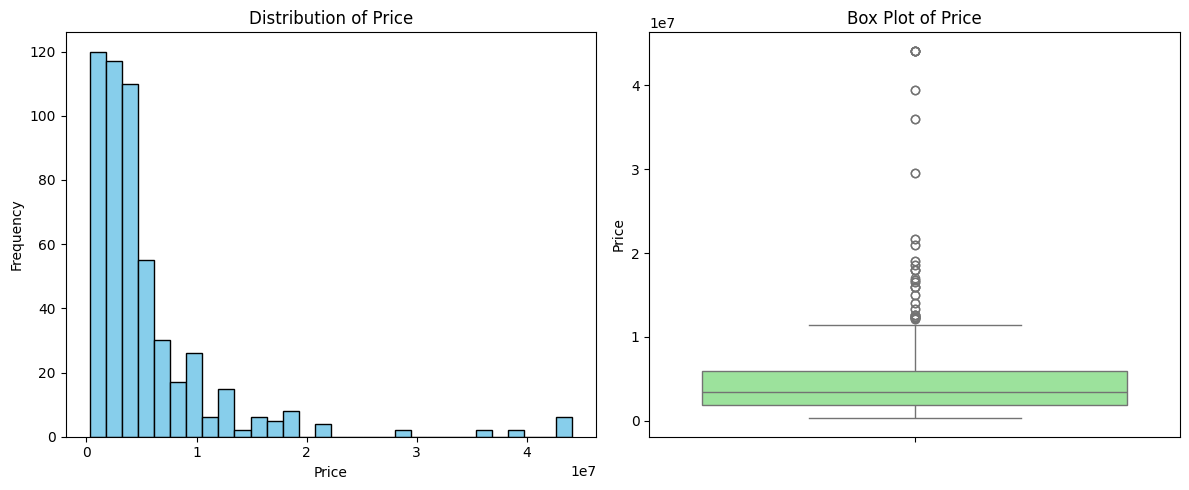

<ipython-input-6-ec5202d0e968>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='price', data=df, palette="Set3")


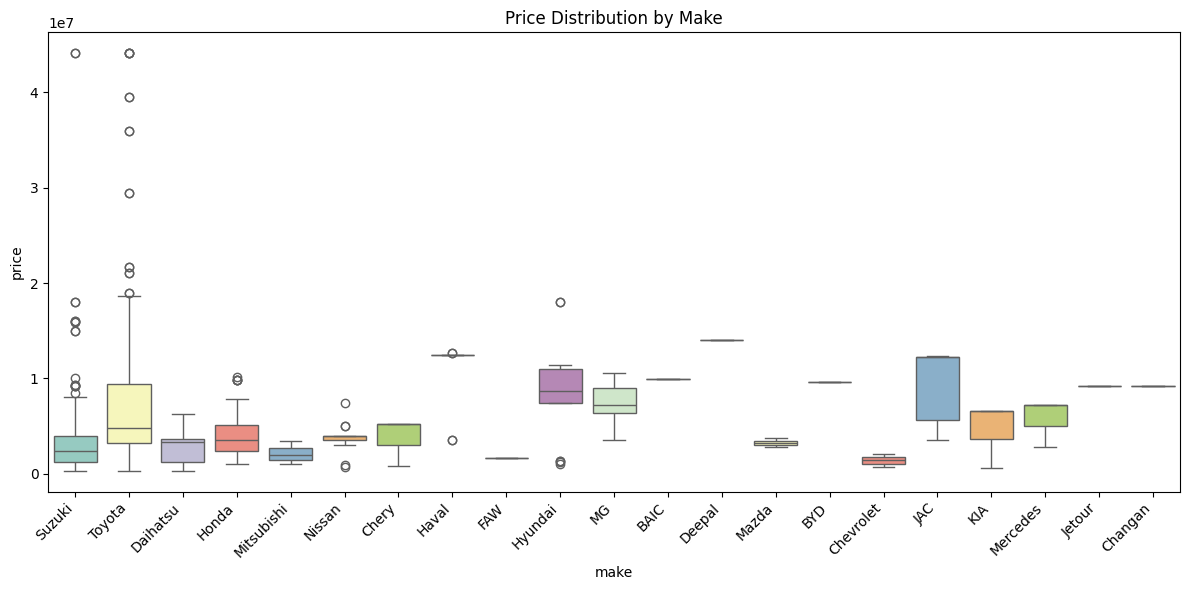

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print("\nDescriptive Statistics grouped by make:")
display(df.groupby('make').describe())
print("\nDescriptive Statistics grouped by fuel_type:")
display(df.groupby('fuel_type').describe())

# 2. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['year', 'mileage', 'engine_capacity', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Price distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'], color='lightgreen')
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.tight_layout()
plt.show()

# Price distribution grouped by make
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='price', data=df, palette="Set3")
plt.title('Price Distribution by Make')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create the visualizations as specified in the instructions, including a scatter plot, box plots, and a bar chart.  Attempt to create an interactive plot using Plotly, but handle potential import errors gracefully.



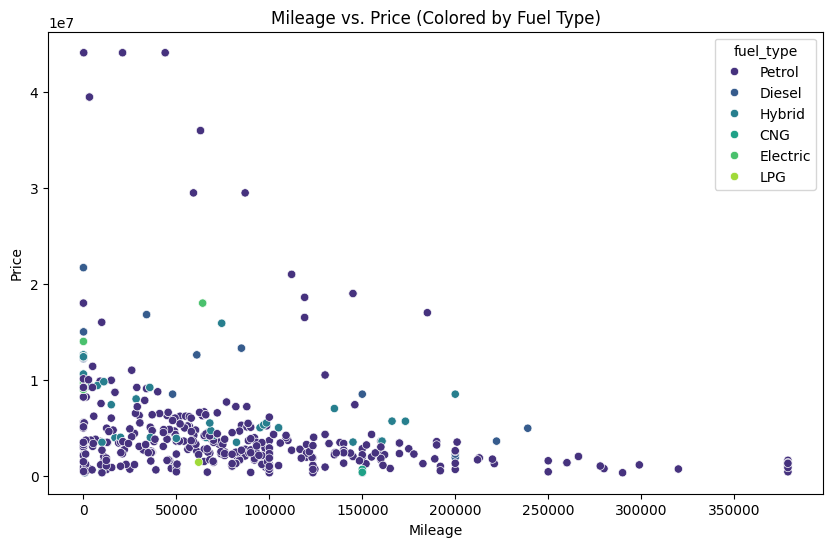

<ipython-input-7-86eec10d9575>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df, palette='Set2')


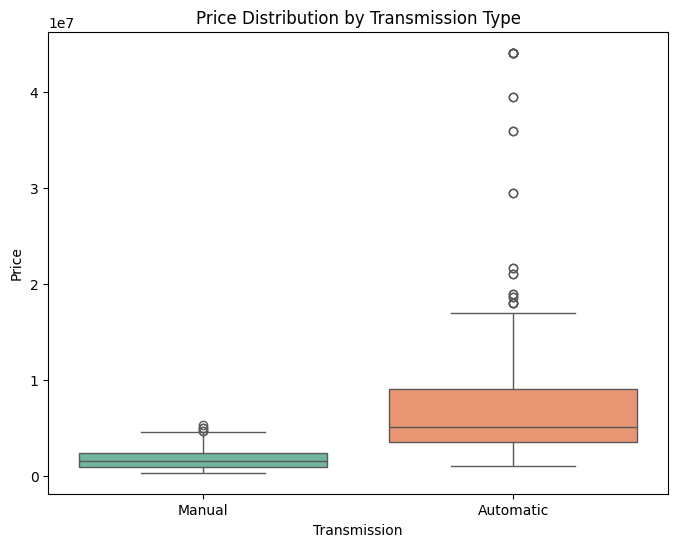

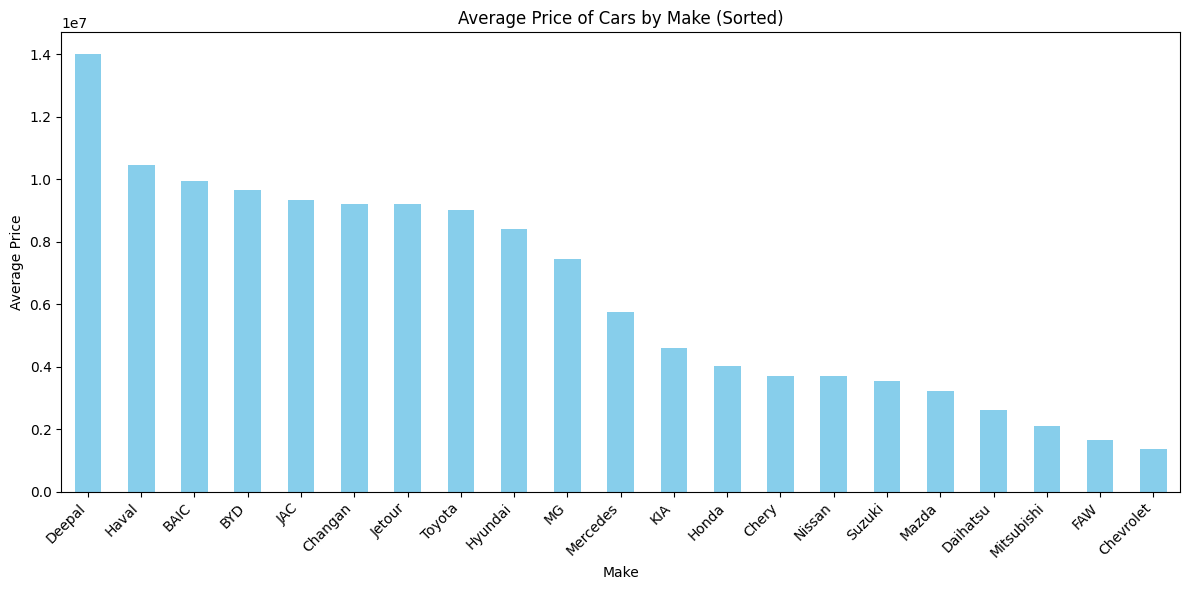

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Scatter plot of 'mileage' vs. 'price', colored by 'fuel_type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', hue='fuel_type', data=df, palette='viridis')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price (Colored by Fuel Type)')
plt.show()

# 2. Box plot of 'price' grouped by 'transmission' type
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df, palette='Set2')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Price Distribution by Transmission Type')
plt.show()

# 3. Bar chart of average price by 'make' (sorted)
average_price_by_make = df.groupby('make')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_price_by_make.plot(kind='bar', color='skyblue')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Make (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Interactive visualization (Plotly)
try:
    fig = px.scatter_3d(df, x='mileage', y='engine_capacity', z='price', color='year',
                        hover_data=['make', 'model'], opacity=0.7)
    fig.update_layout(title='Interactive Price Exploration',
                      scene=dict(xaxis_title='Mileage',
                                 yaxis_title='Engine Capacity',
                                 zaxis_title='Price'))
    fig.show()
except ImportError:
    print("Plotly is not installed.  Interactive visualization cannot be generated.")
    print("To install Plotly, run: pip install plotly")
except Exception as e:
    print(f"An error occurred during interactive visualization: {e}")

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task. However, the task implicitly asks for an understanding of the data, its characteristics, and key relationships within the dataset.  The analysis reveals the following:

* **Relationship between price and other features:**  Engine capacity shows a strong positive correlation with price (0.67), while mileage has a weak negative correlation with price (-0.19).  Year shows a weak positive correlation (0.31).
* **Distribution of price:** The price distribution shows a significant spread, with a large standard deviation and potential outliers.
* **Impact of categorical features on price:**  Visualizations were generated to explore the influence of car make, fuel type, and transmission type on price.

### 2. Data Analysis Key Findings

* **Strong correlation between engine capacity and price:**  Engine capacity has a strong positive correlation (0.67) with price, suggesting that larger engine capacity cars tend to be more expensive.
* **Weak negative correlation between mileage and price:** Mileage has a weak negative correlation (-0.19) with price, suggesting that higher mileage cars might be slightly less expensive.
* **Price distribution and potential outliers:**  The price distribution has a large standard deviation, indicating a wide range of prices and the possible presence of outliers. These outliers were winsorized during data cleaning.
* **Suzuki and Toyota are the most frequent makes:** In the dataset, Suzuki and Toyota are the most commonly occurring car makes.
* **Petrol is the most common fuel type:** Petrol is the most prevalent fuel type among the listed cars.
* **Lahore and Islamabad are the most frequent cities:** The majority of the cars are from Lahore and Islamabad.

### 3. Insights or Next Steps

* **Further investigate the 2025 year entry:** The presence of a '2025' year value, which was corrected to 2020, requires further investigation to understand its origin and ensure data accuracy.  It might be an error in data entry.
* **Model training for price prediction:**  Given the identified correlations, consider training a predictive model (e.g., linear regression, random forest) to estimate car prices based on features like mileage, engine capacity, year, make, model, and fuel type.  Feature engineering might improve the model.


In [44]:
df.head(10)
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
# df.to_csv('cleaned_data.csv', index=False)
df.head(10)

,make,model,year,mileage,fuel_type,engine_capacity,transmission,city,price
0,Suzuki,Margalla,1997,165000,Petrol,1300,Manual,Lahore,750000.0
1,Suzuki,Swift,2019,76000,Petrol,1300,Manual,Lahore,2475000.0
2,Toyota,Hilux,2015,48000,Diesel,3000,Automatic,Islamabad,8500000.0
3,Suzuki,Corolla,2024,5599,Petrol,1600,Automatic,Lahore,6200000.0
4,Suzuki,Corolla,2018,46399,Petrol,1300,Manual,Karachi,1550000.0
5,Daihatsu,Mira,2021,13000,Petrol,660,Automatic,Karachi,3450000.0
6,Daihatsu,Mira,2022,9000,Petrol,660,Automatic,Karachi,3575000.0
7,Daihatsu,Mira,2022,8900,Petrol,660,Automatic,Karachi,3575000.0
8,Toyota,Passo,2018,73000,Petrol,1000,Automatic,Karachi,3275000.0
9,Daihatsu,Mira,2021,12800,Petrol,660,Automatic,Karachi,3475000.0


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the cleaned data
X = df[['year', 'mileage', 'engine_capacity', 'fuel_type', 'transmission']]  # Features
y = df['price']  # Target variable

# One-hot encoding for categorical features
X = pd.get_dummies(X, columns=['fuel_type', 'transmission'], drop_first=True)

# Initial train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

#    # Load the CSV data
# df = pd.read_csv('data.csv')

   # Select relevant features
features = ['make', 'model', 'year']
target = 'price'
X = df[features]
y = df[target]

   # One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['make', 'model']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['make', 'model']))
X = pd.concat([X[['year']], X_encoded_df], axis=1)

   # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
# Example prediction
user_input = {'make': 'Suzuki', 'model': 'Khyber', 'year': 1990}
user_input_df = pd.DataFrame([user_input])

   # Encode user input
user_input_encoded = encoder.transform(user_input_df[['make', 'model']])
user_input_encoded_df = pd.DataFrame(user_input_encoded, columns=encoder.get_feature_names_out(['make', 'model']))
user_input_processed = pd.concat([user_input_df[['year']], user_input_encoded_df], axis=1)

predicted_price = model.predict(user_input_processed)[0]
print(f"Predicted price for {user_input}: {predicted_price}")

Predicted price for {'make': 'Suzuki', 'model': 'Khyber', 'year': 1990}: 349963.66666666674
